In [1]:
import argparse
import sys
import requests
import cv2
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import time

In [2]:
import keras
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [3]:
model_path = "export_models/slim/"

if os.path.exists(model_path):
    print(f"The directory '{model_path}' exists.")
    
    # List the contents of the directory
    contents = os.listdir(model_path)
    print(f"Contents of '{model_path}': {contents}")
else:
    print(f"The directory '{model_path}' does not exist.")


model = tf.keras.models.load_model(model_path)

The directory 'export_models/slim/' exists.
Contents of 'export_models/slim/': ['saved_model.pb', 'variables']






1/1 [==============================] - 3s 3s/step
results: [[5.6317680e-05 9.9994373e-01 3.9680859e-01 3.2679227e-01 4.7254226e-01
  4.5804110e-01]
 [8.2886712e-05 9.9991715e-01 7.2678244e-01 3.3413753e-01 8.1836259e-01
  4.8118058e-01]
 [1.3356612e-04 9.9986637e-01 5.4285562e-01 2.9866859e-01 6.2180078e-01
  4.4381979e-01]
 [3.9528531e-04 9.9960476e-01 1.7993765e-01 3.0905390e-01 2.4772145e-01
  4.2004836e-01]
 [5.8498996e-04 9.9941504e-01 2.9371855e-01 2.3997536e-01 3.7185189e-01
  3.6467311e-01]]


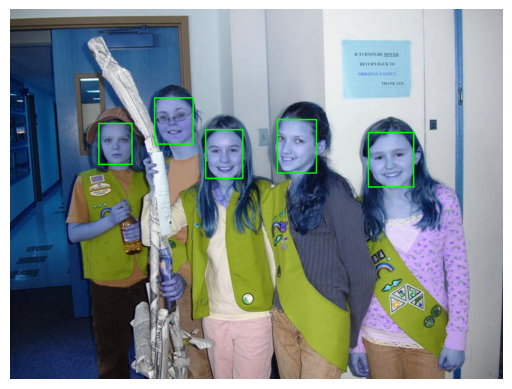

Elapsed time: 21.55326533317566 seconds


In [5]:
start_time = time.time()

model_path = "export_models/slim/"
model = tf.keras.models.load_model(model_path)
img_path = "imgs/3.jpg"

img = cv2.imread(img_path)
h, w, _ = img.shape
img_resize = cv2.resize(img, (320, 240))
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
img_resize = img_resize - 127.0
img_resize = img_resize / 128.0

#target_size = (100, 100)

results = model.predict(np.expand_dims(img_resize, axis=0))  # result=[background,face,x1,y1,x2,y2]
print(f'results: {results}')
# output_dir = 'cropped_images'
# os.makedirs(output_dir, exist_ok=True)
# cropped_images = []

#padding = 5

for i, result in enumerate(results):
    start_x = int(result[2] * w)
    start_y = int(result[3] * h)
    end_x = int(result[4] * w)
    end_y = int(result[5] * h)

    # Add padding
    # start_x = max(0, start_x - padding)
    # start_y = max(0, start_y - padding)
    # end_x = min(w, end_x + padding)
    # end_y = min(h, end_y + padding)
    # # Crop the image

    # cropped_img = img[start_y:end_y, start_x:end_x]
    # #resized_cropped_img = cv2.resize(cropped_img, target_size)
    # cropped_images.append(cropped_img)

    # # # Save the cropped image to the output directory
    # output_path = os.path.join(output_dir, f'cropped_face_3_{i}.jpg')
    # cv2.imwrite(output_path, cropped_img)

    cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)


cv2.imwrite(f'imgs/test_output.jpg', img)
plt.imshow(img)
plt.axis("off")
plt.show()

elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds")